# Time series

## Timestamps

`pandas` represents an instant in time using the `pandas.Timestamp` class: 


In [1]:
import pandas as pd

# Create timestamps
pd.Timestamp(year=2025,
            month=10, 
             day=16,
            hour=9,
            minute=56,
            second=40)

Timestamp('2025-10-16 09:56:40')

In [6]:
pd.Series([pd.Timestamp(2020,10,16),
          pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-16
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

# Data exploration 

In [7]:
# Read in precipitation data
URL= 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<Axes: >

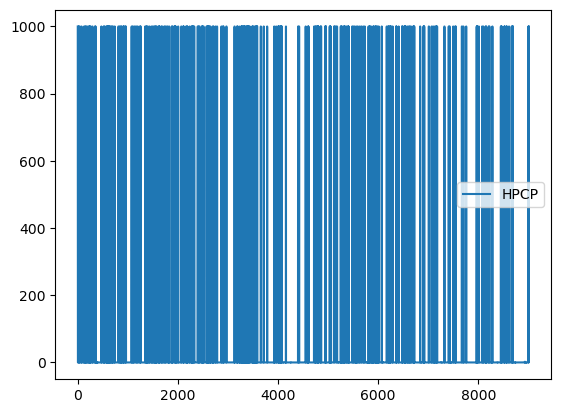

In [8]:
# Plot hourly precipitation in Boulder CO
precip.plot()

## Reading in missing data values

Metadata indicates missing values are 999.99.
We can directly read in this value as an NA value using `pd.read_csv`

In [9]:
# Read in CSV indicating NA values based on metada
precip = pd.read_csv(URL, na_values=[999.99])

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<Axes: >

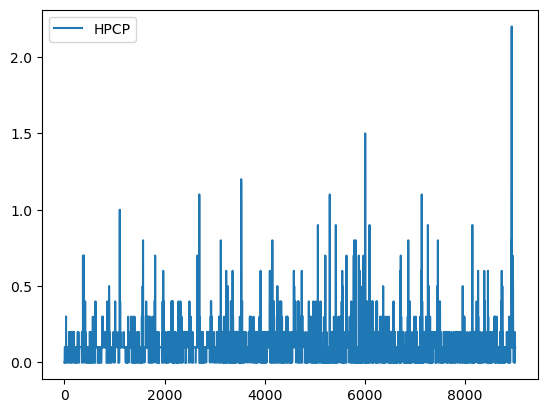

In [10]:
precip.plot()

In [12]:
# Check whether DATE column is of time datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [13]:
# Convert DATE column to timestamps
pd.to_datetime(precip['DATE'])

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [14]:
precip['DATE']

0       20000101 00:00
1       20000101 01:00
2       20000102 20:00
3       20000103 01:00
4       20000103 05:00
             ...      
9001    20131222 01:00
9002    20131223 00:00
9003    20131223 02:00
9004    20131229 01:00
9005    20131231 00:00
Name: DATE, Length: 9006, dtype: object

In [15]:
# Convert DATE column to timestamps
precip['DATE'] = pd.to_datetime(precip['DATE'])

# Check DATE column date type is updated
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<Axes: xlabel='DATE'>

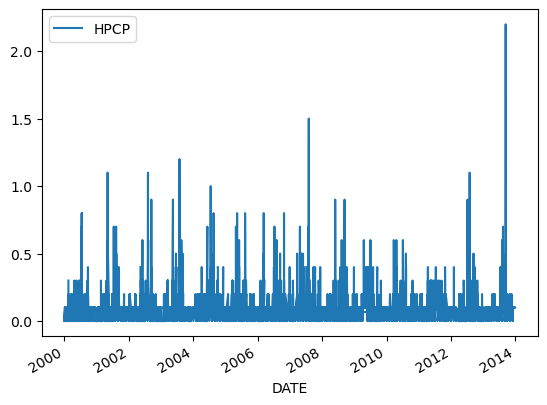

In [18]:
precip.plot(x = 'DATE', y = 'HPCP')

In [19]:
precip = precip.set_index('DATE')

precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<Axes: xlabel='DATE'>

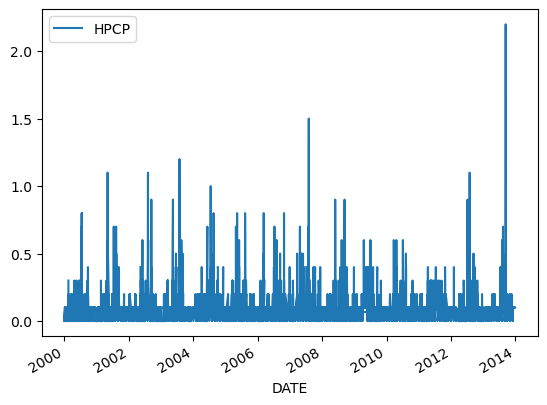

In [20]:
precip.plot()

## Read in dataset in specific format



In [22]:
precip = pd.read_csv(URL, 
                     na_values = [999.99],
                    index_col=['DATE'],
                    parse_dates=['DATE']) # Import them as date 
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Subsetting by date

We can use `.loc[year-month]` to select data from a specific year and month

In [23]:
# Select precipitation data from September 2013
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [24]:
# Select 2013 precipitation data
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<Axes: xlabel='DATE'>

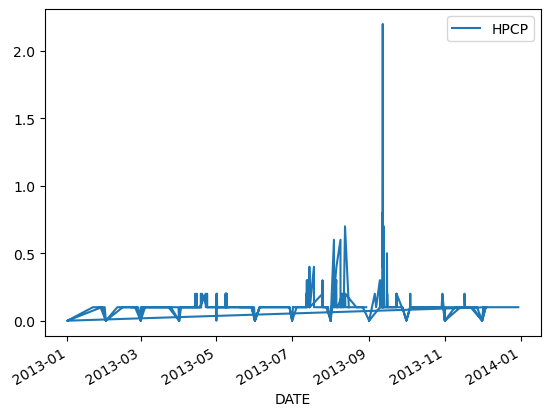

In [25]:
precip.loc['2013'].plot()

## Resample

Resampling a time series means converting a time series from one frequency to another. For example, monthly to yearly(downsampling) or weekly to daily (unsampling).
We can resample with `resample()` method. The samples use it to call 

```
df.resample(new_frequency).aggregator_function()
```
where:

- `new_frequency`: is a string representing the new frequence to resample the data: 'D' for day, 'W' for week, 'Y' for year, 'M' for month
- `aggregator_function()`: is the function we will use to aggregate the data into the new frequency. For example, `max()`, `min()`, `sum()`, or `average()`.

In [29]:
# Resample 2013 hourly data to daily frquency
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

<Axes: title={'center': 'Precipitation in Boulder CO 2013'}, ylabel='Daily precipitation (in)'>

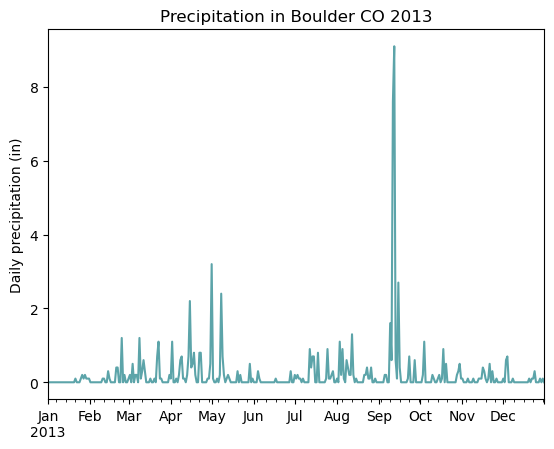

In [35]:
daily_precip_2013.plot(ylabel='Daily precipitation (in)',
                      xlabel='',
                      title='Precipitation in Boulder CO 2013',
                       color = '#5CA4A9',
                      legend=False)

# Example ideal workflow 

In [ ]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)